Teen Market Segmentation Using K-means Clustering

The dataset represents a random sample of 30,000 U.S. high school students who had profiles on a well-known SNS in 2006. To protect the users’ anonymity, the SNS will remain unnamed. The data was sampled evenly across four high school graduation years (2006 through 2009) representing the senior, junior, sophomore, and freshman classes at the time of data collection The dataset contatins 40 variables like: gender, age, friends, basketball, football, soccer, softball, volleyball,swimming, cute, sexy, kissed, sports, rock, god, church, bible, hair, mall, clothes, hollister, drugs etc whcih shows their interests. The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("snsdata.csv")

In [3]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Summary Statistics of Numerical Variables

In [4]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Summary Statistics of Categorical Variables

In [5]:
df.describe(include="object")

,gender
count,27276
unique,2
top,F
freq,22054


Treatment of Missing Values

In [28]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [6]:
df["gender"].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [7]:
df["gender"].value_counts(dropna = False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

Filling with "Not Disclosed" values in NaN values in Gender Column

In [8]:
df["gender"].fillna("not disclosed", inplace=True)

In [20]:
df["gender"].value_counts()

F                22054
M                 5222
not disclosed     2724
Name: gender, dtype: int64

In [9]:
df["gender"].isnull().sum()

0

In [10]:
df["gradyear"].isnull().sum()

0

In [11]:
df["age"].isnull().sum()

5086

In [12]:
df.groupby("gradyear")["age"].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

From the above summary we can observe that the mean age differs by roughly one year per change in graduation year. This is not at all surprising, but a helpful finding for confirming our data is reasonable


We now fill the missing values for each graduation year with the mean that we got as above

In [21]:
df["age"].isnull().sum()

5086

In [24]:
df.groupby("gradyear")["age"].fillna(df["age"].mean())

0        18.982
1        18.801
2        18.335
3        18.875
4        18.995
          ...  
29995    16.115
29996    15.792
29997    15.784
29998    16.378
29999    18.724
Name: age, Length: 30000, dtype: float64

In [25]:
df["age"].isnull().sum()

5086

In [35]:
df["age"].fillna(int(df["age"].mean()), inplace=True)

In [36]:
df["age"].isnull().sum()

0

Here we have treated all the missing values in Age Column

In [38]:
df.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

Treatment of Outliers

The original age range contains value from 3 - 106, which is unrealistic because student at age of 3 or 106 would not attend high school. A reasonable age range for people attending high school will be the age range between 13 to 21. The rest should be treated as outliers keeping the age of student going to high school in mind. Let's detect the outliers using a box plot below

C:\Users\akshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

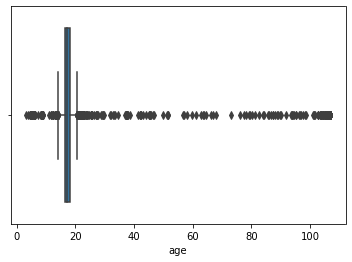

In [39]:
sns.boxplot(df["age"])

In [40]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

1.5629999999999988


In [61]:
data = df[(df["age"] > (Q1 - 1.5*IQR)) & (df["age"] < (Q3 + 1.5*IQR))]

In [62]:
data["age"].describe()

count    29592.000000
mean        17.216873
std          1.059608
min         14.188000
25%         16.501000
50%         17.000000
75%         18.029000
max         20.411000
Name: age, dtype: float64

In [63]:
data.shape

(29592, 40)

C:\Users\akshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

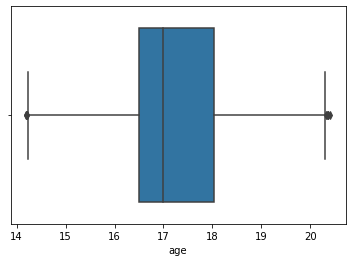

In [64]:
sns.boxplot(data["age"])

Data Preprocessing

A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.
The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here. Specifically, if someone mentions Swimming three times on their profile, without additional information, we have no idea whether this implies they like Swimming more or less than their peers. On the other hand, if the z-score is three, we know that that they mentioned Swimming many more times than the average teenager.

In [65]:
names = data.columns[5:40]
scaled_feature = df.copy()
names

Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [66]:
features = scaled_feature[names]

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [68]:
features = scaler.transform(features.values)

In [69]:
scaled_feature[names] = features
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
1,2006,F,18.801,0,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,1.062991,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
2,2006,M,18.335,69,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,2.019454,-0.220399,-0.177443
3,2006,F,18.875,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
4,2006,not disclosed,18.995,10,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,2.263999,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,2.282303,2.782476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29996,2009,M,15.792,1,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29997,2009,M,15.784,0,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29998,2009,M,16.378,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443


Converting Object Variable to Numeric 

In [70]:
def gender_to_num(x):
    if x=="M":
        return 1
    if x== "F":
        return 2
    if x=="not disclosed":
        return 3

In [71]:
scaled_feature["gender"] = scaled_feature["gender"].apply(gender_to_num)
scaled_feature["gender"]

0        1
1        2
2        1
3        2
4        3
        ..
29995    1
29996    1
29997    1
29998    1
29999    2
Name: gender, Length: 29592, dtype: int64

Checking the Transformed Values

In [90]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
1,2006,2,18.801,0,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,1.062991,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
2,2006,1,18.335,69,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,2.019454,-0.220399,-0.177443
3,2006,2,18.875,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
4,2006,3,18.995,10,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,2.263999,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,2.282303,2.782476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29996,2009,1,15.792,1,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29997,2009,1,15.784,0,0,1.055044,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443
29998,2009,1,16.378,0,0,-0.359072,-0.242624,-0.218754,-0.223864,-0.259969,...,-0.050785,-0.370543,-0.488631,-0.314938,-0.201703,-0.183476,-0.294318,-0.261798,-0.220399,-0.177443


Building the K-means Model

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0, n_jobs = -1)

In [75]:
model = kmeans.fit(scaled_feature)

C:\Users\akshs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Elbow Method

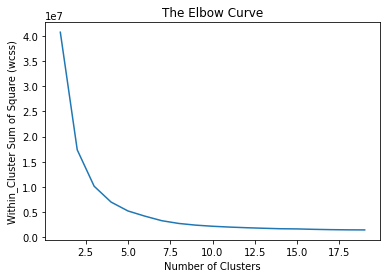

In [78]:
#creating a function with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init=10, random_state = 0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20), wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Within_Cluster Sum of Square (wcss)")
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result

Fit K-means clustering for k=5

In [79]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [80]:
len(kmeans.labels_)

29592

In [81]:
df["cluster"] = kmeans.labels_

C:\Users\akshs\AppData\Local\Temp/ipykernel_21016/1510746749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = kmeans.labels_


In [82]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Interpreting Clustering Results

Lets see cluster sizes first

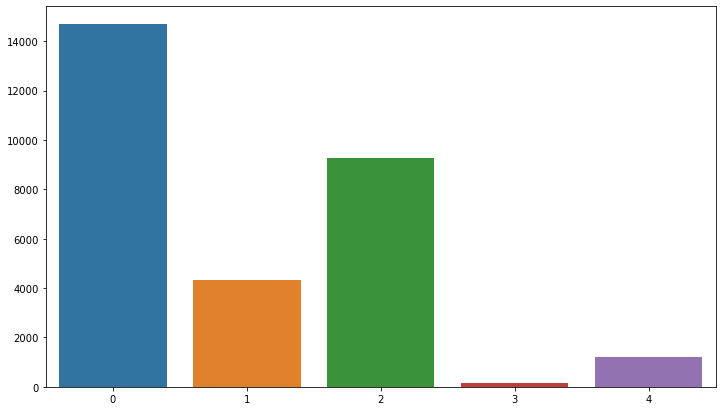

In [85]:
plt.figure(figsize = (12,7))
axis = sns.barplot(x = np.arange(0,5,1), y = df.groupby(["cluster"]).count()["age"].values)

From the above graph we can see that 0 Cluster is the largest and Cluster 1 is has the fewest teen students

In [87]:
size_arr = list(df.groupby(["cluster"]).count()["age"].values)
size_arr

[14679, 4313, 9256, 142, 1202]

Lets check the Cluster Statistics

In [89]:
df.groupby(["cluster"]).mean()[['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs']]

,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.230397,0.192247,0.122079,0.109476,0.116289,0.086791,0.091491,0.081000,0.127461,0.275087,...,0.080864,0.220451,0.299748,0.135636,0.055453,0.040398,0.179168,0.102051,0.084202,0.064310
1,0.285648,0.273128,0.237190,0.179689,0.155344,0.140737,0.128217,0.092279,0.152794,0.401113,...,0.108045,0.323441,0.448412,0.172965,0.095525,0.076977,0.173429,0.122652,0.090424,0.056341
2,0.270635,0.245354,0.178263,0.171456,0.150605,0.111171,0.113008,0.093885,0.154170,0.344209,...,0.119274,0.265557,0.377701,0.156979,0.072277,0.050130,0.193388,0.127269,0.088051,0.056288
3,0.288732,0.288732,0.211268,0.225352,0.225352,0.147887,0.147887,0.077465,0.140845,0.450704,...,0.126761,0.274648,0.514085,0.211268,0.119718,0.147887,0.211268,0.140845,0.140845,0.049296
4,0.294509,0.237937,0.262063,0.207155,0.151414,0.212146,0.136439,0.097338,0.137271,0.480865,...,0.135607,0.433444,0.501664,0.165557,0.137271,0.094842,0.212146,0.142263,0.120632,0.049085


The cluster center values shows each of the cluster centroids of the coordinates. The row referes to the five clusters,the numbers across each row indicates the cluster’s average value for the interest listed at the top of the column. Positive values are above the overall mean level.